## Esame di Metodi Numerici

21 Luglio 2023

# Esercizio 1
Nel file ``testI.mat`` sono memorizzati la matrice A ed il vettore b. 

 - Verificare che per risolvere il sistema Ax=b sia possibile utilizzare i due metodi di discesa visti a lezione, **Punti 1**
 - implementare entrambi gli algoritmi e dire quante iterazioni sono necessarie per ciascuno di essi  per calcolare la soluzione con una toll=1e-6 e maxit=2000. Visualizzare in un grafico l'errore in scala logaritmica ad ogni iterazione per ciascuno dei due metodi. **Punti 6**
 - Verificare se la matrice è  malcondizionata, dire teoricamente cosa questo implica in termini della velocità di convergenza  dei due metodi alla soluzione, richiamando il risultato teorico visto a lezione.**Punti 2**

 - Costruire la matrice A1, ottenuta a partire da A, sommandole uma matrice diagonale con elementi sulla diagonali tutti uguali a 0.05, e termine noto b1, costruito in maniera tale che la soluzione del sistema A1 x1 =b1 sia il vettore formato da tutti 1. Risolvere il sistema lineare con matrice dei coefficienti A1 e termine noto b1, sia con il metodo del gradiente che con il metodo del gradiente coniugato. Osservare il numero di iterazioni eseguito da ciascun metodo e giustificare i risultati  **Punti 2**
  
   **Totale: Punti 11**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testI.mat')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``


In [23]:
from scipy.io import loadmat
import numpy as np
import numpy.linalg as npl
dati = loadmat('testI.mat')
A=dati["A"]
A=A.astype(float)
b=dati["b"]
b=b.astype(float)

#Devo verifichare che la matrice sia simmetrica e definita positiva:

print(np.all(A == A.T))
print(np.all(npl.eigvals(A) > 0))

print("Condizionamento A: ", npl.cond(A))

d = np.eye(A.shape[0])*0.05
A1 = A.copy()
A1 += d
b1 = np.sum(A,axis=1)

#A simmetrica definita positiva mal condizionata. Posso applicare i metodi di discesa del gradiente

def steepestdescent(A,b,x0,itmax,toll):
    
#Metodo del gradiente   per la soluzione di un sistema lineare con matrice dei coefficienti simmetrica e definita positiva
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    r = A.dot(x)-b 
    p = -r 
    it = 0
    nb= npl.norm(b)
    errore= npl.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while errore >= toll  and it <= itmax:
        it=it+1
        Ap = A@p
        rTr= r.T@r
        alpha = rTr / np.dot(p.T,Ap) 
                
        x = x + alpha*p 
        vec_sol.append(x)
        r= A.dot(x)-b
        errore= npl.norm(r)/nb
        vet_r.append(errore)
        p = -r  
        
    
    return x,vet_r,vec_sol,it

x0 = np.zeros((A.shape[0],1))
toll = 1e-6
itmax = 2000
x_sd,res_sd,vet_sol_sd,it_sd = steepestdescent(A,b,x0,itmax,toll)

#print("Sol steepest desc: ",x_sd)
print("Iterazioni sd: ",it_sd)
#print("Residui: ", res_sd)

def conjugate_gradient(A,b,x0,itmax,toll):
    
#Metodo del gradiente coniugato per la soluzione di un sistema lineare con matrice dei coefficienti simmetrica e definita positiva
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0.copy() 
    r = A.dot(x)-b 
    p = -r 
    it = 0
    nb= npl.norm(b)
    errore= npl.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(r)
# utilizzare il metodo del gradiente coniugato per trovare la soluzione
    while errore >= toll and it <= itmax:
        it=it+1
        Ap= A@p
        rtr= r.T@r
        alpha = rtr / np.dot(p.T,Ap)
        x = x + alpha * p
        vec_sol.append(x)
        r= r + alpha*p
        gamma= np.dot(r.T,r) / rtr
        errore= npl.norm(r)/nb
        vet_r.append(r)
        p = -r+gamma*p 
    return x,vet_r,vec_sol,it

x_cj,res_cj,vec_sol_cj,it_cj = conjugate_gradient(A,b,x0,itmax,toll)
#print("Sol cj: ",x_cj)
print("Iterazioni cj: ",it_cj)
#print("Residui: ", res_cj)

#Con problema perturbato:
x_sd_p,res_sd_p,vec_sol_sd_p,it_sd_p = steepestdescent(A1,b1,x0,itmax,toll)
#x_cj_p,res_cj_p,vec_sol_cj_p,it_cj_p = conjugate_gradient(A1,b1,x0,itmax,toll)

print("Iterazioni sd pert: ",it_sd_p)
#print("Iterazioni cj pert: ", it_cj_p)

#Dopo aver perturbato la matrice dei coefficienti si osserva che il tempo di esecuzione del gradiente coniugato esplode
#Tuttavia col metodo steepest descent vengono eseguite molte meno iterazioni e l'algoritmo termina piu' in fretta.

True
True
Condizionamento A:  9999.999999985845
Iterazioni sd:  2001
Iterazioni cj:  2001
Iterazioni sd pert:  166


# Esercizio 2

Siano assegnati i vettori
$$
x = [1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0] , $$
$$
y = [1.18, 1.26, 1.23, 1.37, 1.37, 1.45, 1.42, 1.46, 1.53, 1.59, 1.59] 
$$

contenenti rispettivamente le ascisse e le ordinate di 11 punti del piano.

Scrivere lo script  in cui
 - si determini il polinomio di approssimazione ai minimi quadrati di grado 1 dei  punti assegnati sviluppando  le functions necessarie; **Punti: 4**
- si determini il polinomio di interpolazione dei punti assegnati sviluppando le functions necessarie;  **Punti: 4**
- si consideri il set di dati ($x_i,\hat{y}_i$) , dove $\hat{y}_i = 0.2 x_i+1$, $i = 0, ..., 10$ e si ricalcolino il polinomio di approssimazione ai minimi quadrati di grado 1 e il polinomio di interpolazione a partire dai nuovi punti $(x_i, \hat{y}_i)$, i = 0, ..., 10; **Punti: 1**
- si rappresentino in figura 1 (rispettivamente in figura 2) il primo (rispettivamente il secondo) set di punti assegnato insieme al polinomio di approssimazione ai minimi quadrati e al polinomio di interpolazione ottenuti da questi dati; **Punti: 1**
- si fornisca una spiegazione teorica ai risultati ottenuti, utilizzando i teoremi visti a lezione.   **Punti: 4**

**Totale:  14**

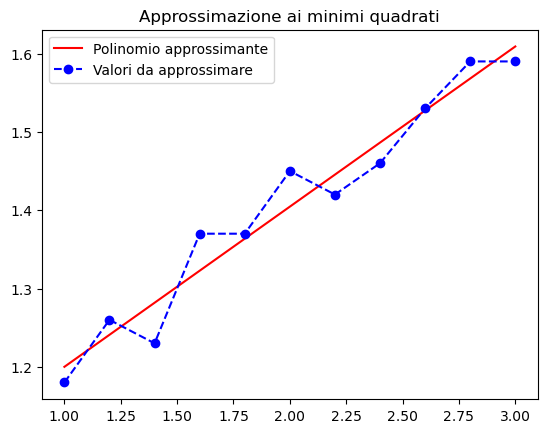

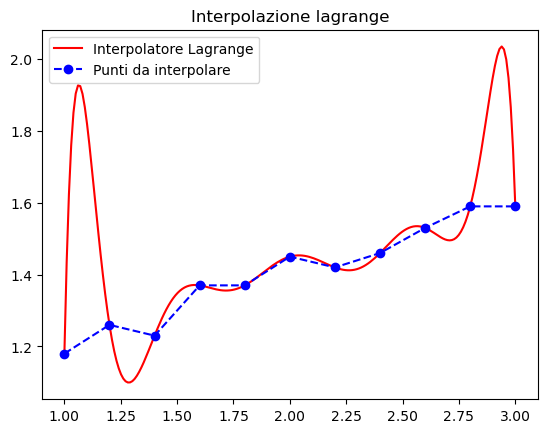

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as spl
import RisolviSis
#Soluzione di un sistema sovradeterminato facendo uso della fattorizzazione QR    
def qrLS(A,b):
    n=A.shape[1]  # numero di colonne di A
    #Calcola la fattorizzazione QR di A e utilizzala per calcolare
    #la soluzione nel senso dei minimi quadrati di Ax=b
    Q,R=spl.qr(A)
    h = Q.T@b
    x,flag = RisolviSis.Usolve(R[0:n,],h[0:n])
    residuo = npl.norm(h[n:])**2
    return x,residuo

x = np.array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0])
y = np.array([1.18, 1.26, 1.23, 1.37, 1.37, 1.45, 1.42, 1.46, 1.53, 1.59, 1.59])

m = x.shape[0]
n = 1
n1 = n+1
A = np.vander(x,increasing=True)[:,:n1]
alpha,residuo = qrLS(A,y)

xv = np.linspace(np.min(x),np.max(x),200)
pol = np.polyval(np.flip(alpha),xv)

plt.plot(xv,pol,'r-', x,y,'bo--')
plt.title("Approssimazione ai minimi quadrati")
plt.legend(["Polinomio approssimante","Valori da approssimare"])
plt.show()

def plagr(xnodi,k):
    """
    Restituisce i coefficienti del k-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if k==0:
       xzeri=xnodi[1:n]
    else:
       xzeri=np.append(xnodi[0:k],xnodi[k+1:n])
    
    num= np.poly(xzeri)
    den= np.polyval(num,xnodi[k])
    
    p= num/den
    
    return p

def InterpL(x, f, xx):
     """"
        %funzione che determina in un insieme di punti il valore del polinomio
        %interpolante ottenuto dalla formula di Lagrange.
        % DATI INPUT
        %  x  vettore con i nodi dell'interpolazione
        %  f  vettore con i valori dei nodi 
        %  xx vettore con i punti in cui si vuole calcolare il polinomio
        % DATI OUTPUT
        %  y vettore contenente i valori assunti dal polinomio interpolante
        %
     """
     n=x.size
     m=xx.size
     L=np.zeros((m,n))
     for k in range(n):
        p= plagr(x,k)
        L[:,k]= np.polyval(p,xx)
    
    
     return np.dot(L,f)

pLagr = InterpL(x,y,xv)

plt.plot(xv,pLagr,'r',x,y,'bo--')
plt.title("Interpolazione lagrange")
plt.legend(["Interpolatore Lagrange", "Punti da interpolare"])
plt.show()


## Domanda intelligenza artificiale

- Allenamento di una rete neurale: dopo aver descritto come è composta una rete neurale, descrivi in cosa consiste la fase di forward propagation e la fase di backward propagation. **Punti: 1**
- Ottimizzazione della loss function per il training di una rete neurale per il task di regressione: Metodo di discesa del gradiente, metodo stocastico del gradiente, metodo del gradiente minibatch.  **Punti 1**  
 - Non convessità della loss-function - come non rimanere bloccati in un monimo locale? Metodo del gradiente con momentum. **Punti 2**
- Learning rate scheduling: step decay, decadimento esponenziale, decadimento dipendente dal tempo. **Punti 1**
 - Learning rate adattivo: Adagrad, RMSProp, Adadelta, Adam. **Punti 2**
 
 **Totale:  7**